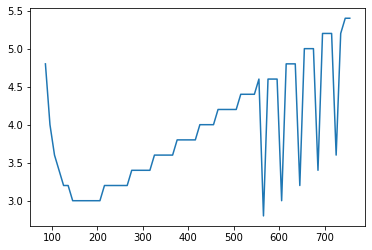

In [81]:
import os
import csv
import sys
import math
import matplotlib.pyplot as plt

file = open("電界分布計算結果.csv")
csv_reader = csv.reader(file)

r = []
z = []
V = []
Er = []
Ez = []
E = []
alpha = []
pcmhg = [i for i in range (1, 100)] #P(cmHg)
#print(pcmhg)
p = [766.5-i*10.0-1.0 for i in pcmhg] #P(torr)


pd = []
Vs = []
d = 0.5
K = 10

#データ読み込み
for row in csv_reader:
    r.append(float(row[1]))
    z.append(float(row[2])*10)
    V.append(float(row[3]))
    Er.append(float(row[4]))
    Ez.append(float(row[5]))
    E.append(float(row[6])*1000)

for p_ in range (0, 68): #pごとにVsを計算
    integral = 0
    #数値積分
    ratio = 0
    while (integral < K):
        ratio += 0.2
        integral = 0
        for i in range (1, 103): #gap=0.5, r=0のデータを使う(???)
            #zで、0.0mmから積分値>Kになるところまで積分(???)
            #alphaの計算
            Enew = ratio * E[i]
            if(Enew/p[p_]<31.6):
                alpha = 0
            elif (31.6 <= Enew/p[p_] and Enew/p[p_] < 60):
                alpha = p[p_]/10000.0*(1.407*((Enew/p[p_]-28.5)*(Enew/p[p_]-28.5))-12.6)
            elif (60.0 <= Enew/p[p_] and Enew/p[p_] < 100.0):
                alpha = (1.0-0.00674755*(Enew/p[p_]-60.0))*p[p_]/10000.0*(1.407*((Enew/p[p_]-28.5)*(Enew/p[p_]-28.5))-12.6)
            elif (Enew/p[p_] > 100.0):
                alpha = 15.0 * p[p_] * math.exp(-365.0/(Enew/p[p_]))
            integral += (z[i]-z[i-1])*alpha
    pd.append(p[p_])
    Vs.append(ratio)
    
plt.plot(pd,Vs)